<a href="https://colab.research.google.com/github/amita-kapoor/UO-Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Solutions/Exercise_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

Now that we have learned about CNNs, it is time to test our understanding. The aim of this exercise is to ensure :
* You know how to add convolutional layers and Dense layers and build a model.
* From analyzing the dataset you are able to determine the input shape to the model and number of classes needed to classify the dataset.
* Build a baseline model with accuracy > 60%.
* Visualize the filters learned by the model and the image as is visible through these filters.
* And finally use the techniques (Dropout, Batch Normalization, Data augmentation) you learned to build a better model. 

The exercise in this notebook are of two types:
1. Exercise: You will find four exercises spread through out the notebook. You will write answer to the questions asked in these exercises. They may involve writing a new or completing an existing code sequence.

2. TASKS TO DO: These are purely coding assignments, you will use the knowledge you gained to complete the missing code. Missing code is represented by `...` in the notebook. Remove `...` and write the correct statements/values.

Wish you all the best.

P.S. Do not forget to use GPU if you are working on Colab.








In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
# Clear out any prior log data.
!rm -rf logs


# Import necessary modules

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers 
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
import sys
import numpy as np

# Part 1: Building a model
<a id='ex_1'></a>
**Exercise 1**  Complete the code below. The `build_model` function has to build a CNN with following arguments:

* ***input_shape***: The number of features in the input data
* ***filters***: A list containing number of filters in the two convolutional layers.
* ***n_hidden***:Number of neurons in the dense layer
* ***nb_classes***: Number of output units/classes

In [2]:
# TASK TO DO: Complete the code below
def build_model(input_shape, filters, n_hidden, nb_classes):
  '''
  Function to build a CNN
  Arguments:
  input_shape: The number of features in the input data
  filters: A list containing number of filters in the two convolutional layers.
  n_hidden:Number of neurons in the dense layer
  nb_classes: Number of output units/classes

  Returns:
  Returns the CNN model built
  '''
  model = models.Sequential()
  # Add a convolutional layer with filter[0] filters and 3x3 kernel. The activation function be ReLU
  model.add(Convolution2D(filters[0], (3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D((2, 2)))
  # Add a convolutional layer with filter[1] filters and 3x3 kernel. The activation function be ReLU
  model.add(Convolution2D(filters[1], (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  # Add a Dense layer with n_hidden number of units and ReLU activation
  model.add(Dense(n_hidden, activation='relu') )
  # Add a Dense layer with nb_classes number of units and Softmax activation
  model.add(Dense(nb_classes, activation='softmax'))
  return model

In [3]:
# Do not change anything below
INPUT_SHAPE = (28,28,1)
NUM_CLASSES = 5
N_HIDDEN = 100
FILTERS = [32,64]
cnn_model = build_model(INPUT_SHAPE, FILTERS, N_HIDDEN, NUM_CLASSES)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

If you have defined the model correctly you should see a Model with `179,421` traiable parameters.

# Part 2: Working with CIFAR 10
Let us now use the function  to build a model to classify CIFAR 10 images. 

### Loading and Pre-processing data

In [4]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
# Preprocess data
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

<a id='ex_2'></a>
**Exercise 2**: Use the print statement to determine:
1. What is the number of rows in image?
2. What is the number of columns in  image?
3. How many channels are present in the input image?
4. What is the number of images in Test and training dataset?



**Answer** (Double click to edit)

In [6]:
# TASK TO DO: Complete the code below
print("The shape of training dataset is: ",X_train.shape )
print("The shape of test dataset is: ", X_test.shape)

The shape of training dataset is:  (50000, 32, 32, 3)
The shape of test dataset is:  (10000, 32, 32, 3)


In [7]:
# TASK TO DO: Complete the code below
IMG_rows =   32
IMG_cols = 32
channel = 3
NUM_CLASSES = 10
N_HIDDEN = 128
FILTERS = [32,32]

#Do not change anything below
input_shape = (IMG_rows, IMG_cols, channel)
cnn_model = build_model(input_shape, FILTERS, N_HIDDEN, NUM_CLASSES)

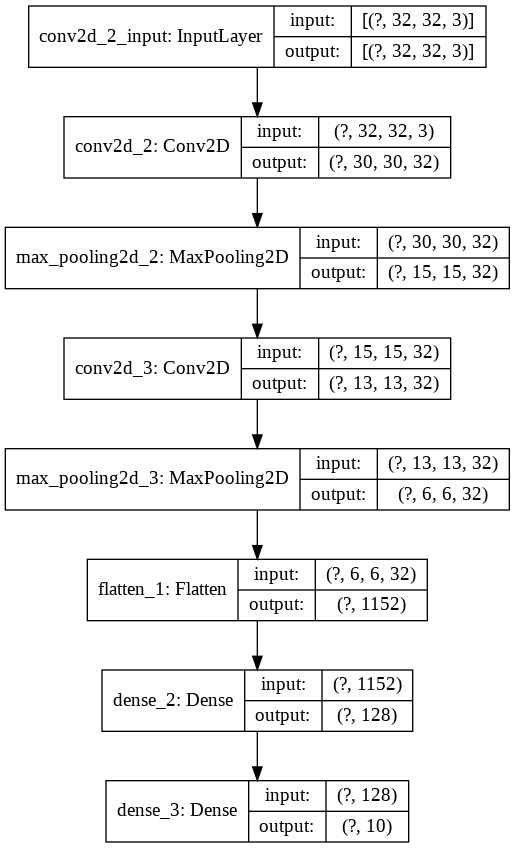

In [8]:
plot_model(cnn_model, show_shapes=True)

# Part 3: Choosing a baseline model
<a id='ex_3'></a>
**Exercise 3**: Now that we have a base model choose the Hyperparameters:
* OPTIM: The optimizer to be used
* BATCH_SIZE: The size of batch for training.
* EPOCHS: The number of Epochs

You have to find the values such that our base model has accuracy greater than **60%**.  

**Answer**: (Double click to edit)

In [9]:
# TASK TO DO: Complete the code below
# Choose the hyper parameters such that accuracy of the model is greater than 60%
OPTIM = tf.keras.optimizers.RMSprop()
BATCH_SIZE = 128
EPOCHS = 20
VERBOSE = 1
VALIDATION_SPLIT = 0.2

# Do not change anything below
## Using Tensorboard
callbacks = [# Write TensorBoard logs to `./logs` directory
             tf.keras.callbacks.TensorBoard(log_dir='./logs')
             ]
cnn_model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])
 
cnn_model.fit(X_train, y_train, batch_size=BATCH_SIZE,
	epochs=EPOCHS, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE, callbacks=callbacks) 

Epoch 1/20
313/313 [==============================] - 38s 120ms/step - loss: 1.7310 - accuracy: 0.3777 - val_loss: 1.4648 - val_accuracy: 0.4825
Epoch 2/20
313/313 [==============================] - 38s 120ms/step - loss: 1.3996 - accuracy: 0.5059 - val_loss: 1.3760 - val_accuracy: 0.5120
Epoch 3/20
313/313 [==============================] - 38s 120ms/step - loss: 1.2464 - accuracy: 0.5615 - val_loss: 1.2060 - val_accuracy: 0.5786
Epoch 4/20
313/313 [==============================] - 38s 120ms/step - loss: 1.1381 - accuracy: 0.6029 - val_loss: 1.1359 - val_accuracy: 0.5970
Epoch 5/20
313/313 [==============================] - 41s 130ms/step - loss: 1.0538 - accuracy: 0.6306 - val_loss: 1.1054 - val_accuracy: 0.6173
Epoch 6/20
313/313 [==============================] - 38s 121ms/step - loss: 0.9859 - accuracy: 0.6549 - val_loss: 1.2049 - val_accuracy: 0.5859
Epoch 7/20
313/313 [==============================] - 40s 127ms/step - loss: 0.9251 - accuracy: 0.6775 - val_loss: 1.0158 - val_ac

In [10]:
# Do not change anything here
score = cnn_model.evaluate(X_test, y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy: {:.2f}%'.format(score[1]*100))

assert score[1] > 0.6 , "Accuracy below 60% please change your hyperparameters and retry"

79/79 [==============================] - 3s 33ms/step - loss: 1.2174 - accuracy: 0.6666

Test score: 1.2173532247543335
Test accuracy: 66.66%


# Part 4: Visualization

Now that you have trained your model for an accuracy greater than 60%, let us visualize what is happening inside the CNN network.  Below we have defined two functions:
* `plot_filter` : This funtion allows you to see the kernel learned by each convolutional layer. In our case the first covultional layer has 32 filters for the 3 input channels, making a total of `3*32= 96` filters. Similarly the second convolutional layer will have `32*32= 1024` filters. 

* `plot_figure`: This function  allows you to see the features selected by each of the filters from a given image. That is it is showing you how the image is visible to the model.

**Exercise 4**: There is no coding requirement for this exercise, you just need to run the cells below and comment on the output. 


**Answer**: (Double click to edit)

In [11]:
# Do not change anything below
def plot_filter(filters, fig_size = (40,40)):
  cols = filters.shape[3]
  rows = filters.shape[2]
  #print(rows,cols)
  fig = plt.figure(figsize=fig_size)
  ix = 1
  for i in range(filters.shape[3]):
    f = filters[:,:,:,i]
    for j in range(filters.shape[2]):
      ax = fig.add_subplot(rows, cols, ix)
      ax.axis('off')
      plt.imshow(f[:,:,j], cmap='gray')
      ix += 1
  

In [12]:
# Do not change anything below
def plot_image(model,filters, layer_name, img, fig_size=(40,40)):
  img = np.reshape(img, (1, img.shape[0], img.shape[1], img.shape[2]))
  intermediate_layer_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
  intermediate_output = intermediate_layer_model.predict(img)
  print(intermediate_output.shape)
  output = np.squeeze(intermediate_output)
  output = np.moveaxis(output, 2, 0)
  print(output.shape)
  fig = plt.figure(figsize=(40, 40))
  no_filters = filters.shape[3]

  cols = filters.shape[3]
  rows = filters.shape[2]

  for i in range(output.shape[0]):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.axis('off')
    plt.imshow(output[i], cmap='gray')


conv2d_2 (3, 3, 3, 32)
conv2d_3 (3, 3, 32, 32)


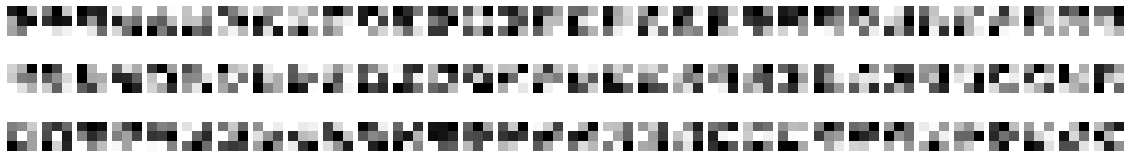

In [13]:
# summarize filter shapes
filters = []
layers_name = []
for layer in cnn_model.layers:
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue
  # get filter weights
  filter_, _ = layer.get_weights()
  filters.append(filter_)
  layers_name.append(layer.name)
  print(layer.name, filter_.shape)
# Let us plot the filters of the first Convolutional layer
plot_filter(filters[0],(20,3))

(1, 30, 30, 32)
(32, 30, 30)


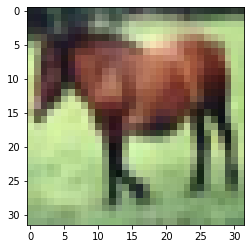

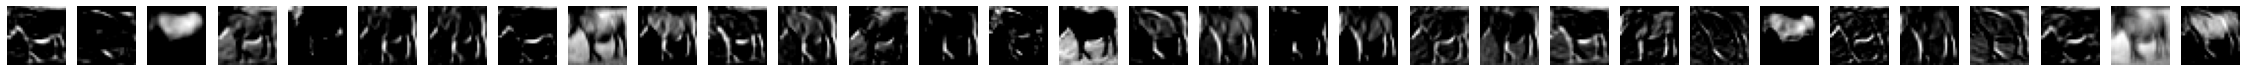

In [14]:
img = X_train[7]
plt.imshow(img)
# Image as seen by first Convolutional layer
plot_image(cnn_model,filters[0], layers_name[0], img)

Below you can use the TensorBoard to see the details of the training.

In [ ]:
%tensorboard --logdir logs

# Part 5: Building a model from scratch

**Exercise 5**:  Now that you have a baseline model, use the techniques like Droput, BatchNormalization and/or Data Augmentation to improve the accuracy of the model. You need to build a model with a minimum accuacy of 80%.


In [16]:
## TASK TO DO: Complete the code below
# Write a function to build your own CNN model 
def build_your_model():
  ...

In [ ]:
new_model = build_your_model(input_shape, FILTERS, N_HIDDEN, NUM_CLASSES)
new_model.summary()

In [ ]:
## TASK TO DO: Complete the code below
# Define Optimizers and train the model

new_model.compile(...)
new_model.fit(...)

In [ ]:
# Let us now evaluate you model
# Do not change anything here
score = new_model.evaluate(X_test, y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy: {:.2f}%'.format(score[1]*100))

assert score[1] > 0.8 , "Accuracy below 80% model not acceptable"

# Part 6: Optional Exercise

You can use the `plot_filter` and `plot_image` functions as well as TensorBoard to visualize results. Explore all the layers and reflect on what you understand.